Bank Customer Churn Model


In this Real world Problem on Bank Customer Churn Model we learnt the Data Encoding, Feature Scaling, Handling Imbalanced Data, Support Vector Machine Classifier and Grid Search for Hyperparameter tuning from scratch with detailed explanation of the concept.

Data Source :  https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

Import Dataset

In [5]:
df = pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Describe Data : Data consists of Customer id, Surname, Credit Score, Geography, Gender, Age, Tenure, Balance, Num of products, has Credit card, Is active member, Estimated Salary, Churn

Data Visualisation

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df = df.set_index('CustomerId')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Data Preprocessing

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.replace({'Geography':{'France': 2, 'Germany': 1, 'Spain' : 0}}, inplace = True)

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender' : {'Male': 0, 'Female': 1}}, inplace = True)

<Axes: xlabel='Num Of Products', ylabel='Count'>

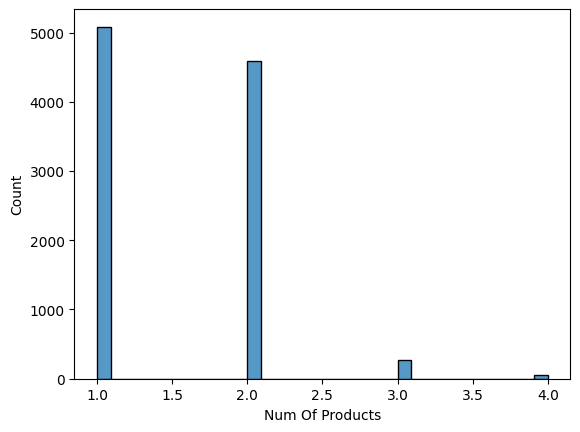

In [16]:
sns.histplot(df['Num Of Products'])

In [17]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products' : {1:0, 2:1, 3:1, 4:1}}, inplace = True)

In [19]:
df['Num Of Products'].value_counts()

0    5084
1    4916
Name: Num Of Products, dtype: int64

<Axes: xlabel='Num Of Products', ylabel='Count'>

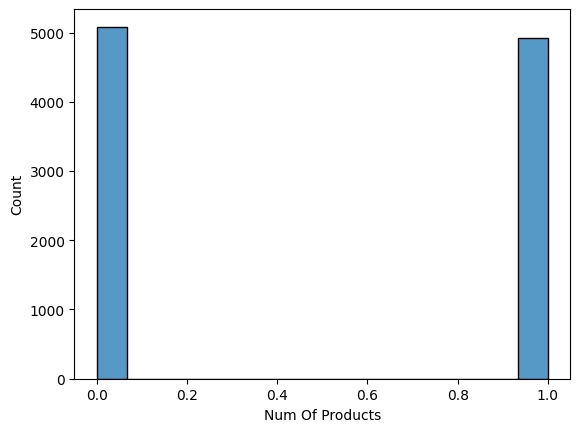

In [20]:
sns.histplot(df['Num Of Products'])

In [21]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [22]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [23]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [24]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

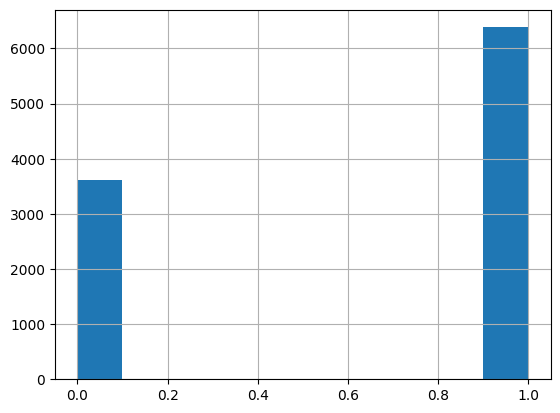

In [25]:
df['Zero Balance'].hist()

In [26]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [27]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

Define Target Variable (y) and Feature Variables (X)

In [28]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [29]:
y = df['Churn']

In [30]:
X.shape, y.shape

((10000, 11), (10000,))

In [31]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

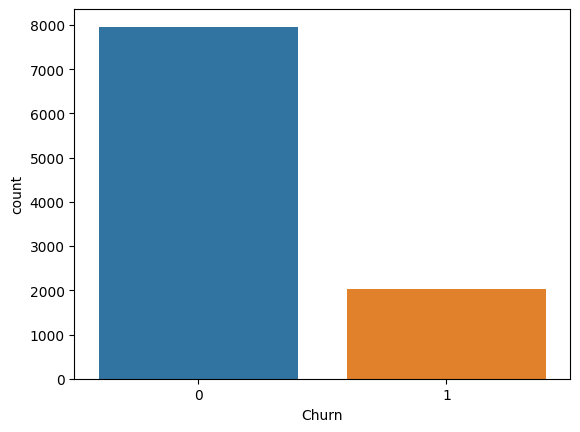

In [32]:
sns.countplot(x ='Churn', data = df);

In [33]:
X.shape, y.shape

((10000, 11), (10000,))

Random Under Sampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
rus = RandomUnderSampler(random_state= 2529)

In [36]:
X_rus, y_rus = rus.fit_resample(X, y)

In [37]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [38]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [39]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

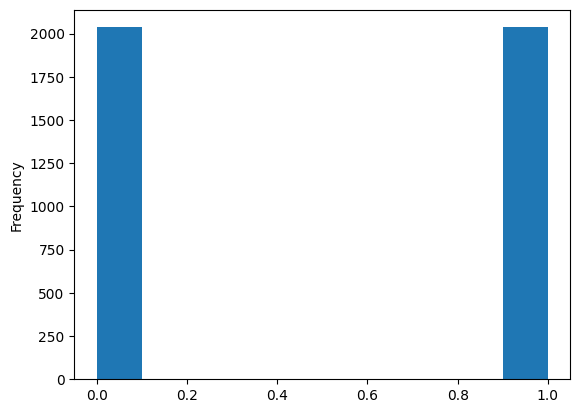

In [40]:
y_rus.plot(kind = 'hist')

Random Over Sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
ros = RandomOverSampler(random_state=2529)

In [43]:
X_ros, y_ros = ros.fit_resample(X, y)

In [44]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [45]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [46]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

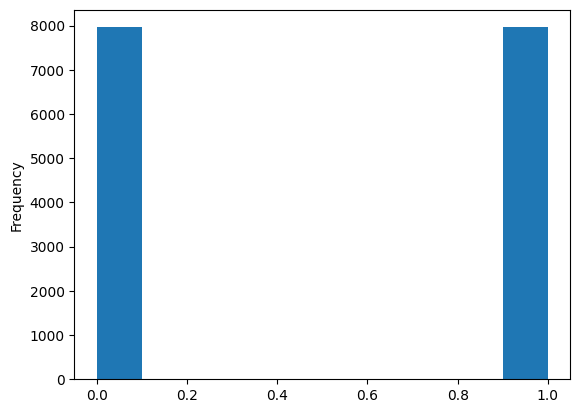

In [47]:
y_ros.plot(kind = 'hist')

Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

Split Original Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

In [51]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

Modeling

Standardize Features

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

Standardize Original Data

In [54]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15777459,619,0,1,32,4,175406.13,1,1,1,172792.43,1
15583049,643,1,1,34,7,160426.07,0,0,1,188533.11,1
15768746,561,2,0,33,6,0.00,1,0,0,173680.39,0
15743976,618,1,0,41,8,37702.79,0,1,1,195775.48,1
15682322,714,2,0,37,9,148466.93,1,0,1,151280.96,1


In [55]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [56]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [57]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15777459,-0.344595,0,1,-0.656750,-0.342170,1.583725,1,1,1,1.248214,1
15583049,-0.095181,1,1,-0.466380,0.698162,1.344106,0,0,1,1.521225,1
15768746,-0.947345,2,0,-0.561565,0.351385,-1.222055,1,0,0,1.263615,0
15743976,-0.354987,1,0,0.199916,1.044940,-0.618965,0,1,1,1.646839,1
15682322,0.642668,2,0,-0.180824,1.391718,1.152808,1,0,1,0.875112,1


Standardize Random Under Sample Data

In [58]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [59]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Standardize Random over Sample Data

In [60]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [61]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Support Vector Machine Classifier

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC()

In [64]:
svc.fit(X_train, y_train)

SVC()

In [65]:
y_pred = svc.predict(X_test)

Model Evaluation

Model Accuracy

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
confusion_matrix(y_test, y_pred)

array([[2384,   32],
       [ 440,  144]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.82      0.25      0.38       584

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C': [0,1,1, 10],
              'gamma':[1,0,1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0, 1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [73]:
grid_predictions = grid.predict(X_test)

In [74]:
confusion_matrix(y_test,grid_predictions)

array([[2147,  269],
       [ 370,  214]])

In [75]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2416
           1       0.44      0.37      0.40       584

    accuracy                           0.79      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.77      0.79      0.78      3000



Model with Random Under Sampling

In [76]:
svc_rus = SVC()

In [77]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [78]:
y_pred_rus = svc_rus.predict(X_test_rus)

Model Accuracy

In [79]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[480, 160],
       [159, 424]])

In [80]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       640
           1       0.73      0.73      0.73       583

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



Hyperparameter Tunning

In [81]:
param_grid = {'C': [0,1,1, 10],
              'gamma':[1,0,1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [82]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 5)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0, 1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [83]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [84]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [85]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[462, 178],
       [164, 419]])

In [86]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       640
           1       0.70      0.72      0.71       583

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [87]:
param_grid = {'C': [0,1,1, 10],
              'gamma':[1,0,1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [88]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 10)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=0, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0, 1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [90]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [91]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2067,  359],
       [ 104, 2248]])

In [92]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2426
           1       0.86      0.96      0.91      2352

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



Prediction

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.82      0.25      0.38       584

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



In [94]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2416
           1       0.44      0.37      0.40       584

    accuracy                           0.79      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.77      0.79      0.78      3000



In [95]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       640
           1       0.73      0.73      0.73       583

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [96]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       640
           1       0.70      0.72      0.71       583

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [97]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2426
           1       0.86      0.96      0.91      2352

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

models=[RandomForestClassifier(),
        LogisticRegression(max_iter=1000),
        DecisionTreeClassifier(),
        KNeighborsClassifier()]


In [99]:
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,y_pred))
  print("Accuracy score: ",accuracy_score(y_test,y_pred))


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.71      0.36      0.48       584

    accuracy                           0.85      3000
   macro avg       0.79      0.66      0.69      3000
weighted avg       0.83      0.85      0.83      3000

Accuracy score:  0.847
LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2416
           1       0.61      0.21      0.31       584

    accuracy                           0.82      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.79      0.82      0.78      3000

Accuracy score:  0.8203333333333334
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2416
           1       0.39      0.40      0.39       584

    accuracy                           

In [100]:
for model in models:
  model.fit(X_train_ros,y_train_ros)
  y_pred_ros=model.predict(X_test_ros)
  print(model)
  print(classification_report(y_test_ros,y_pred_ros))
  print("Accuracy score: ",accuracy_score(y_test_ros,y_pred_ros))


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2426
           1       0.90      0.96      0.93      2352

    accuracy                           0.92      4778
   macro avg       0.93      0.93      0.92      4778
weighted avg       0.93      0.92      0.92      4778

Accuracy score:  0.9246546672247803
LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2426
           1       0.69      0.69      0.69      2352

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778

Accuracy score:  0.6971536207618251
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2426
           1       0.81      0.89      0.85      2352

    accuracy              

In [101]:
for model in models:
  model.fit(X_train_rus,y_train_rus)
  y_pred_rus=model.predict(X_test_rus)
  print("model: ",model)
  print("report: ",classification_report(y_test_rus,y_pred_rus))
  print("Accuracy score: ",accuracy_score(y_test_rus,y_pred_rus))


model:  RandomForestClassifier()
report:                precision    recall  f1-score   support

           0       0.74      0.73      0.73       640
           1       0.71      0.71      0.71       583

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

Accuracy score:  0.7219950940310711
model:  LogisticRegression(max_iter=1000)
report:                precision    recall  f1-score   support

           0       0.73      0.71      0.72       640
           1       0.69      0.71      0.70       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223

Accuracy score:  0.7105478331970564
model:  DecisionTreeClassifier()
report:                precision    recall  f1-score   support

           0       0.65      0.57      0.61       640
           1       0.58      0

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(X_train_ros,y_train_ros)
y_pred_ros=model.predict(X_test_ros)
accuracy_score(y_test_ros,y_pred_ros)

0.9236082042695689

Explaination

The overall accuracy is highest in Random Over Sample for RandomForestClassifier